# Notebook #1

### Dataset information 



A notebook that gives basic information about the datasets used in the matching process

# Initialize Notebook

In [1]:
import sys
sys.path.append("./utils")

import pandas     as pd
import numpy      as np
import matplotlib.pyplot  as plt
from astropy.io   import fits
from tabulate     import tabulate

from config_loader import ConfigLoader
from data_loader import DataLoader

In [2]:
config = ConfigLoader("/Users/trevin/Documents/Git/h20_xray_catalog_matching/src/configs/config.yaml")
data = DataLoader(verbose = 1)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelpad'] = 20
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 16


# Dataframe Head

In [3]:
#https://erosita.mpe.mpg.de/dr1/AllSkySurveyData_dr1/Catalogues_dr1/MerloniA_DR1/eRASS1_Main.html
pd.set_option('display.max_columns', None)
df_erosita = data.get_dataframe(config.EROSITA_PATH)
df_erosita.head(10)

Filename: /Users/trevin/Documents/Git/h20_xray_catalog_matching/src/data/raw/eRASS1_Main.v1.1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (17863,)   uint8   
  1  CATALOG       1 BinTableHDU    731   930203R x 252C   [23A, 32A, J, J, K, K, J, D, D, D, D, E, E, E, E, E, E, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E,

,IAUNAME,DETUID,SKYTILE,ID_SRC,UID,UID_Hard,ID_CLUSTER,RA,DEC,RA_RAW,DEC_RAW,RA_LOWERR,RA_UPERR,DEC_LOWERR,DEC_UPERR,POS_ERR,RADEC_ERR,LII,BII,ELON,ELAT,MJD,MJD_MIN,MJD_MAX,EXT,EXT_ERR,EXT_LOWERR,EXT_UPERR,EXT_LIKE,DET_LIKE_0,ML_CTS_1,ML_CTS_ERR_1,ML_CTS_LOWERR_1,ML_CTS_UPERR_1,ML_RATE_1,ML_RATE_ERR_1,ML_RATE_LOWERR_1,ML_RATE_UPERR_1,ML_FLUX_1,ML_FLUX_ERR_1,ML_FLUX_LOWERR_1,ML_FLUX_UPERR_1,ML_BKG_1,ML_EXP_1,ML_EEF_1,APE_CTS_1,APE_BKG_1,APE_EXP_1,APE_RADIUS_1,APE_POIS_1,DET_LIKE_P1,ML_CTS_P1,ML_CTS_ERR_P1,ML_CTS_LOWERR_P1,ML_CTS_UPERR_P1,ML_RATE_P1,ML_RATE_ERR_P1,ML_RATE_LOWERR_P1,ML_RATE_UPERR_P1,ML_FLUX_P1,ML_FLUX_ERR_P1,ML_FLUX_LOWERR_P1,ML_FLUX_UPERR_P1,ML_BKG_P1,ML_EXP_P1,ML_EEF_P1,APE_CTS_P1,APE_BKG_P1,APE_EXP_P1,APE_RADIUS_P1,APE_POIS_P1,DET_LIKE_P2,ML_CTS_P2,ML_CTS_ERR_P2,ML_CTS_LOWERR_P2,ML_CTS_UPERR_P2,ML_RATE_P2,ML_RATE_ERR_P2,ML_RATE_LOWERR_P2,ML_RATE_UPERR_P2,ML_FLUX_P2,ML_FLUX_ERR_P2,ML_FLUX_LOWERR_P2,ML_FLUX_UPERR_P2,ML_BKG_P2,ML_EXP_P2,ML_EEF_P2,APE_CTS_P2,APE_BKG_P2,APE_EXP_P2,APE_RADIUS_P2,APE_POIS_P2,DET_LIKE_P3,ML_CTS_P3,ML_CTS_ERR_P3,ML_CTS_LOWERR_P3,ML_CTS_UPERR_P3,ML_RATE_P3,ML_RATE_ERR_P3,ML_RATE_LOWERR_P3,ML_RATE_UPERR_P3,ML_FLUX_P3,ML_FLUX_ERR_P3,ML_FLUX_LOWERR_P3,ML_FLUX_UPERR_P3,ML_BKG_P3,ML_EXP_P3,ML_EEF_P3,APE_CTS_P3,APE_BKG_P3,APE_EXP_P3,APE_RADIUS_P3,APE_POIS_P3,DET_LIKE_P4,ML_CTS_P4,ML_CTS_ERR_P4,ML_CTS_LOWERR_P4,ML_CTS_UPERR_P4,ML_RATE_P4,ML_RATE_ERR_P4,ML_RATE_LOWERR_P4,ML_RATE_UPERR_P4,ML_FLUX_P4,ML_FLUX_ERR_P4,ML_FLUX_LOWERR_P4,ML_FLUX_UPERR_P4,ML_BKG_P4,ML_EXP_P4,ML_EEF_P4,APE_CTS_P4,APE_BKG_P4,APE_EXP_P4,APE_RADIUS_P4,APE_POIS_P4,DET_LIKE_P5,ML_CTS_P5,ML_CTS_ERR_P5,ML_CTS_LOWERR_P5,ML_CTS_UPERR_P5,ML_RATE_P5,ML_RATE_ERR_P5,ML_RATE_LOWERR_P5,ML_RATE_UPERR_P5,ML_FLUX_P5,ML_FLUX_ERR_P5,ML_FLUX_LOWERR_P5,ML_FLUX_UPERR_P5,ML_BKG_P5,ML_EXP_P5,ML_EEF_P5,APE_CTS_P5,APE_BKG_P5,APE_EXP_P5,APE_RADIUS_P5,APE_POIS_P5,DET_LIKE_P6,ML_CTS_P6,ML_CTS_ERR_P6,ML_CTS_LOWERR_P6,ML_CTS_UPERR_P6,ML_RATE_P6,ML_RATE_ERR_P6,ML_RATE_LOWERR_P6,ML_RATE_UPERR_P6,ML_FLUX_P6,ML_FLUX_ERR_P6,ML_FLUX_LOWERR_P6,ML_FLUX_UPERR_P6,ML_BKG_P6,ML_EXP_P6,ML_EEF_P6,APE_CTS_P6,APE_BKG_P6,APE_EXP_P6,APE_RADIUS_P6,APE_POIS_P6,DET_LIKE_P7,ML_CTS_P7,ML_CTS_ERR_P7,ML_CTS_LOWERR_P7,ML_CTS_UPERR_P7,ML_RATE_P7,ML_RATE_ERR_P7,ML_RATE_LOWERR_P7,ML_RATE_UPERR_P7,ML_FLUX_P7,ML_FLUX_ERR_P7,ML_FLUX_LOWERR_P7,ML_FLUX_UPERR_P7,ML_BKG_P7,ML_EXP_P7,ML_EEF_P7,APE_CTS_P7,APE_BKG_P7,APE_EXP_P7,APE_RADIUS_P7,APE_POIS_P7,DET_LIKE_P8,ML_CTS_P8,ML_CTS_ERR_P8,ML_CTS_LOWERR_P8,ML_CTS_UPERR_P8,ML_RATE_P8,ML_RATE_ERR_P8,ML_RATE_LOWERR_P8,ML_RATE_UPERR_P8,ML_FLUX_P8,ML_FLUX_ERR_P8,ML_FLUX_LOWERR_P8,ML_FLUX_UPERR_P8,ML_BKG_P8,ML_EXP_P8,ML_EEF_P8,APE_CTS_P8,APE_BKG_P8,APE_EXP_P8,APE_RADIUS_P8,APE_POIS_P8,DET_LIKE_P9,ML_CTS_P9,ML_CTS_ERR_P9,ML_CTS_LOWERR_P9,ML_CTS_UPERR_P9,ML_RATE_P9,ML_RATE_ERR_P9,ML_RATE_LOWERR_P9,ML_RATE_UPERR_P9,ML_FLUX_P9,ML_FLUX_ERR_P9,ML_FLUX_LOWERR_P9,ML_FLUX_UPERR_P9,ML_BKG_P9,ML_EXP_P9,ML_EEF_P9,APE_CTS_P9,APE_BKG_P9,APE_EXP_P9,APE_RADIUS_P9,APE_POIS_P9,APE_CTS_S,APE_BKG_S,APE_EXP_S,APE_POIS_S,FLAG_SP_SNR,FLAG_SP_BPS,FLAG_SP_SCL,FLAG_SP_LGA,FLAG_SP_GC_CONS,FLAG_NO_RADEC_ERR,FLAG_NO_EXT_ERR,FLAG_NO_CTS_ERR,FLAG_OPT
0,1eRASS J002937.2-310209,eb01_009120_020_ML00003_002_c010,9120,3,100912000003,200912000004,2,7.405249,-31.036103,7.405692,-31.035628,0.862056,0.944134,0.747086,0.732261,1.367573,1.277169,352.285584,-83.838559,353.038170,-31.128088,59002.515625,59002.179688,59003.015625,0.000000,0.000000,0.000000,0.000000,0.000000,792.535339,178.306870,13.893217,13.500502,14.285933,1.665662,0.129784,0.126116,0.133453,1.550895e-12,1.208418e-13,1.174260e-13,1.242576e-13,0.611076,107.048668,0.883602,136,0.297771,107.044205,7.477509,0.0,232.818756,53.531761,7.542389,7.139240,7.945539,0.492878,0.069444,0.065732,0.073156,5.347488e-13,7.534375e-14,7.131654e-14,7.937097e-14,0.182306,108.610573,0.892302,38,0.124088,108.610268,6.948209,0.000000e+00,289.129486,65.438179,8.453674,8.069227,8.838122,0.600661,0.077597,0.074068,0.081126,4.419874e-13,5.709844e-14,

In [4]:
pd.set_option('display.max_columns', None)
df_edff = data.get_dataframe(config.EDFF_PATH)
df_edff.head(10)

Filename: /Users/trevin/Documents/Git/h20_xray_catalog_matching/src/data/raw/DAWN_EDFF_DR1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    268   1062645R x 130C   [K, D, D, D, D, D, D, D, D, 43A, K, K, D, 20A, E, D, D, D, D, D, D, L, D, D, D, D, D, D, L, D, D, D, D, D, D, L, D, D, D, D, D, D, L, D, D, D, D, D, D, L, D, D, D, D, D, D, L, D, D, D, D, D, D, L, D, D, D, D, D, D, L, D, D, D, D, D, D, L, D, D, D, D, D, D, D, K, D, D, K, K, D, K, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, D, D, E, D]   


,ID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,GROUP_ID,N_GROUP,MODEL_FLAG,SOLUTION_MODEL,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_NB0816_MAG,HSC_NB0816_MAGERR,HSC_NB0816_FLUX,HSC_NB0816_FLUXERR,HSC_NB0816_CHISQ,HSC_NB0816_DRIFT,HSC_NB0816_VALID,HSC_NB0921_MAG,HSC_NB0921_MAGERR,HSC_NB0921_FLUX,HSC_NB0921_FLUXERR,HSC_NB0921_CHISQ,HSC_NB0921_DRIFT,HSC_NB0921_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,lp_zPDF,lp_zPDF_l68,lp_zPDF_u68,lp_zMinChi2,lp_chi2_best,lp_zp_2,lp_chi2_2,lp_NbFilt,lp_zq,lp_chiq,lp_modq,lp_mods,lp_chis,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,lp_SFR_med_min68,lp_SFR_med_max68,lp_SFR_best,lp_sSFR_med,lp_sSFR_med_min68,lp_sSFR_med_max68,lp_sSFR_best,ez_z_phot,ez_z_phot_chi2,ez_z_phot_risk,ez_z_min_risk,ez_min_risk,ez_z_raw_chi2,ez_raw_chi2,ez_z_ml,ez_z_ml_chi2,ez_z_ml_risk,ez_z025,ez_z160,ez_z500,ez_z840,ez_z975,ez_nusefilt,ez_lc_min,ez_lc_max,ez_star_min_chi2,ez_star_teff
0,1,52.357832,-28.015619,30860.257400,13805.184308,0.085609,0.078303,52.357813,-28.015630,84_10000,7133,1,0.0,DevGalaxy,0.008067,0.244099,0.038200,25.431085,0.170423,0.855771,0.000137,True,0.241856,0.016933,25.441109,0.076242,0.838295,0.002879,True,0.367419,0.018993,24.987096,0.056295,1.214715,0.001433,True,0.553794,0.019933,24.541628,0.039197,0.881066,0.001825,True,0.572930,0.127948,24.504746,0.243198,1.174499,0.000455,True,24.179534,0.288425,0.773012,0.204735,0.994490,0.000235,True,24.766254,0.289006,0.450296,0.119503,0.993660,0.000333,True,0.248496,0.023791,25.411703,0.104259,0.461124,0.002720,True,0.332080,0.024589,25.096892,0.080635,0.345424,0.002907,True,0.2739,0.2271,0.4957,0.25080,3.119610,0.58,8.40127,7,0.10,14.64870,1,140,28.792400,9,5.000000e+07,0.4,1,-14.39824,-15.87910,-15.92102,7.31936,7.10996,7.51830,6.97556,-1.07858,-1.41111,-0.76005,-0.3699,-8.38682,-8.92388,-7.90127,-7.345,0.263709,7.140742,0.286292,0.246077,0.284072,0.221403,6.836875e+00,0.219051,6.828080,0.290870,0.067486,0.155573,0.263709,0.503743,0.647144,7,3640.981999,45020.337852,9.676304,4800.0
1,2,52.319698,-28.015597,31581.719675,13802.165124,0.024598,0.023457,52.319718,-28.015598,84_10001,7117,1,0.0,ExpGalaxy,0.008453,0.580868,0.023028,24.489807,0.043172,1.006324,0.003965,True,0.641079,0.010144,24.382721,0.017231,1.058447,0.019112,True,0.766861,0.012455,24.188208,0.017687,1.130228,0.007700,True,1.382581,0.012933,23.548273,0.010186,1.330757,0.005565,True,1.625042,0.079703,23.372839,0.053412,1.210985,0.004524,True,23.686655,0.125781,1.217133,0.140581,1.036741,0.000713,True,23.346758,0.052938,1.664550,0.080916,0.959715,0.000403,True,1.374851,0.019157,23.554361,0.015174,0.982006,0.035655,True,1.219494,0.019209,23.684551,0.017153,0.456101,0.032404,True,0.8300,0.7862,0.8732,0.83320,17.081100,NaN,NaN,7,0.00,92.67000,4,225,368.737000,5,6.405000e+08,0.1,1,-18.62216,-19.53033,-19.46875,8.88403,8.81660,8.95326,8.89260,0.21810,-0.01433,0.31627,0.2267,-8.65482,-8.99191,-8.53425,-8.666,0.817779,17.086884,0.091938,0.822119,0.091774,0.803988,1.698096e+01,0.807446,16.973167,0.093952,0.108311,0.767913,0.817779,0.866753,0.913370,7,3640.981999,45020.337852,285.494263,4000.0
2,3,52.440821,-28.015964,29290.181053,13804.580551,0.020469,0.019597,52.440827,-28.015956,84_10002,7128,1,0.0,DevGalaxy,0.008042,0.352241,0.018886,25.032899,0.058387,0.614941,0.003633,True,0.598796,0.008660,2

In [5]:
pd.set_option('display.max_columns', None)
df_cdfs = data.get_dataframe(config.CDFS_PATH)
df_cdfs.head(10)

Filename: /Users/trevin/Documents/Git/h20_xray_catalog_matching/src/data/raw/cdfs_xray_cat.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  J_ApJS_228_2_sources    1 TableHDU       196   1055R x 43C   [F10.6, F10.6, F5.1, F5.2, F7.1, F5.1, F5.1, F7.1, F5.1, F5.1, F7.1, F5.1, F5.1, A7, F5.2, F5.2, F5.2, F5.2, F5.2, F5.2, F5.2, F5.2, F6.3, A8, I2, F6.3, A5, F6.3, F5.2, E8.1, E8.1, E8.1, D8.1, E8.1, D8.1, A6, A1, I3, A1, I3, I4, I3, I3]   


,RAJ2000,DEJ2000,logPB,errPos,FB,e_FB,e_fb_lc,SB,e_SB,e_sb_lc,HB,e_HB,e_hb_lc,CPCat,CPoff,RmagW,zmagGS,zmagG,F125Wmag,KsmagT,_3_6mag,VLAmag,zspec,q_zspec,r_zspec,zF,r_zF,BR,Gamma,FFB,FSB,FHB,LX,NH,LXc,OType,f_X11ID,X11ID,f_X16ID,X16ID,R13ID,CCat,zCat
0,52.899178,-27.859588,0.0,0.53,886.7,38.2,39.3,604.3,28.2,29.4,282.9,26.1,27.3,GEMS,0.52,21.97,0.0,22.27,0.0,20.70,20.25,0.00,1.628,Secure,16,1.628,zSpec,0.374,1.78,2.400000e-14,1.100000e-14,1.300000e-14,3.600000e+44,8.900000e+20,3.800000e+44,AGN,,1,,127,1059,1,2
1,52.911023,-27.892965,-10.2,1.08,98.9,20.1,21.2,67.3,12.3,13.5,57.7,-1.0,-1.0,GEMS,0.45,23.84,0.0,23.73,0.0,22.65,0.00,0.00,0.000,,0,1.364,H14,0.374,1.85,3.600000e-15,1.700000e-15,-3.100000e-15,3.900000e+43,0.000000e+00,3.900000e+43,AGN,,0,,150,96,1,1
2,52.917119,-27.796253,0.0,0.66,245.2,22.0,23.1,152.6,14.9,16.1,92.7,16.4,17.6,GEMS,0.10,22.14,0.0,22.26,0.0,21.21,20.89,0.00,2.713,Secure,16,2.713,zSpec,0.488,1.75,6.300000e-15,2.700000e-15,3.500000e-15,2.900000e+44,6.200000e+21,3.200000e+44,AGN,,2,,159,201,2,3
3,52.919726,-27.773984,-4.5,1.01,65.6,18.2,19.4,29.8,-1.0,-1.0,49.5,15.7,16.9,GEMS,0.75,26.29,0.0,25.34,0.0,23.15,0.00,0.00,0.000,,0,1.522,H14,2.353,0.08,2.000000e-15,-3.000000e-16,1.900000e-15,5.400000e+42,2.400000e+23,5.900000e+43,AGN,,0,,0,220,1,1
4,52.920710,-27.743110,-14.4,0.97,88.7,13.8,15.0,32.3,7.5,8.7,56.4,11.6,12.8,TENIS,0.25,0.00,0.0,0.00,0.0,22.39,21.29,19.26,0.000,,0,0.833,H14,1.410,0.58,8.500000e-15,1.200000e-15,7.200000e-15,1.300000e+43,5.400000e+22,4.700000e+43,AGN,,3,,165,255,1,0
5,52.930145,-27.901341,-11.4,1.00,93.3,15.9,17.1,27.1,-1.0,-1.0,78.3,13.7,14.9,GEMS,0.72,25.74,0.0,23.93,0.0,21.52,20.72,18.56,1.271,Insecure,12,0.736,H14,3.895,-0.42,7.300000e-15,-5.900000e-16,7.100000e-15,5.100000e+42,1.300000e+23,4.300000e+43,AGN,,4,,181,1038,1,1
6,52.930889,-27.850931,-8.1,0.73,148.4,29.0,30.2,56.1,15.8,17.0,92.4,24.5,25.6,GEMS,1.95,19.05,0.0,18.32,0.0,17.07,18.58,18.85,0.310,Secure,16,0.310,zSpec,1.405,0.58,1.200000e-15,1.700000e-16,1.000000e-15,2.700000e+41,2.300000e+22,6.600000e+41,AGN,,5,,187,0,2,1
7,52.934481,-27.823753,0.0,0.58,247.2,30.2,31.3,108.6,17.2,18.3,138.8,25.0,26.2,SEDS,0.68,0.00,0.0,0.00,0.0,24.06,23.11,0.00,0.000,,0,2.535,L10,1.077,0.88,1.600000e-15,3.200000e-16,1.300000e-15,2.100000e+43,2.200000e+23,1.100000e+44,AGN,,6,,197,169,2,1
8,52.936212,-27.865600,0.0,0.60,270.8,30.2,31.3,158.4,18.5,19.7,112.6,24.3,25.5,TENIS,0.25,0.00,0.0,0.00,0.0,22.44,21.58,0.00,0.000,,0,2.808,L10,0.620,1.40,1.700000e-15,5.600000e-16,1.100000e-15,5.300000e+43,6.600000e+22,1.100000e+44,AGN,,7,,201,122,1,1
9,52.937251,-27.860624,-15.2,0.67,186.2,28.7,30.4,116.3,18.2,20.0,70.3,22.9,24.8,TENIS,0.53,0.00,0.0,0.00,0.0,21.88,20.96,0.00,0.000,,0,2.927,H14,0.530,1.57,1.100000e-15,4.000000e-16,6.500000e-16,4.500000e+43,3.400000e+22,7.100000e+43,AGN,,8,,205,1056,2,1


## RA and DEC Plots

In [6]:
edff_color = '#e46868'
erosita_color = '#3d7cdc'
cdfs_color = '#6ead50'

df_erosita_RA, df_erosita_DEC = df_erosita['RA_RAW'], df_erosita['DEC_RAW']
df_edff_RA, df_edff_DEC = df_edff['ALPHA_J2000'], df_edff['DELTA_J2000']
df_cdfs_RA, df_cdfs_DEC = df_cdfs['RAJ2000'], df_cdfs['DEJ2000']

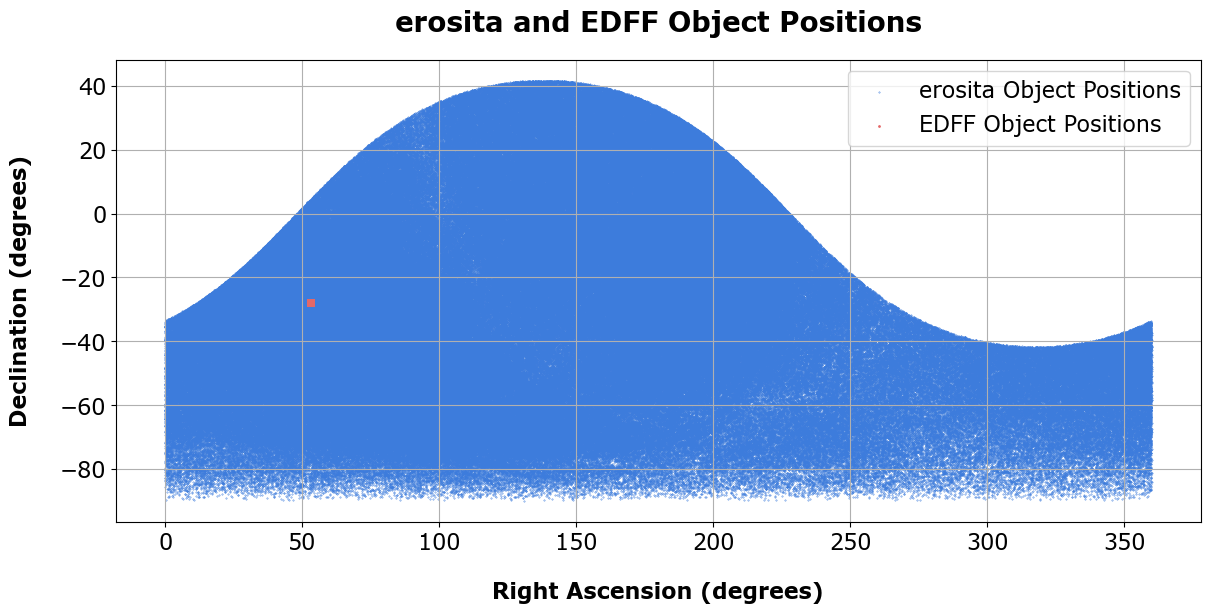

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.scatter(df_erosita_RA, df_erosita_DEC, c=erosita_color, s=0.1, label='erosita Object Positions')
ax.scatter(df_edff_RA, df_edff_DEC, c=edff_color, s=1, label='EDFF Object Positions')

ax.set_title('erosita and EDFF Object Positions')
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.grid(True)
ax.legend()

plt.savefig('images/erosita_h20_fields.png')
plt.show()

EDFF: 1062645 erosita: 221 CDFS: 1055


/var/folders/q7/t55xnmgd6g90y6txj7yx8f3c0000gn/T/ipykernel_9148/248515245.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('images/all_fields.png')
/Users/trevin/miniconda3/envs/agn/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


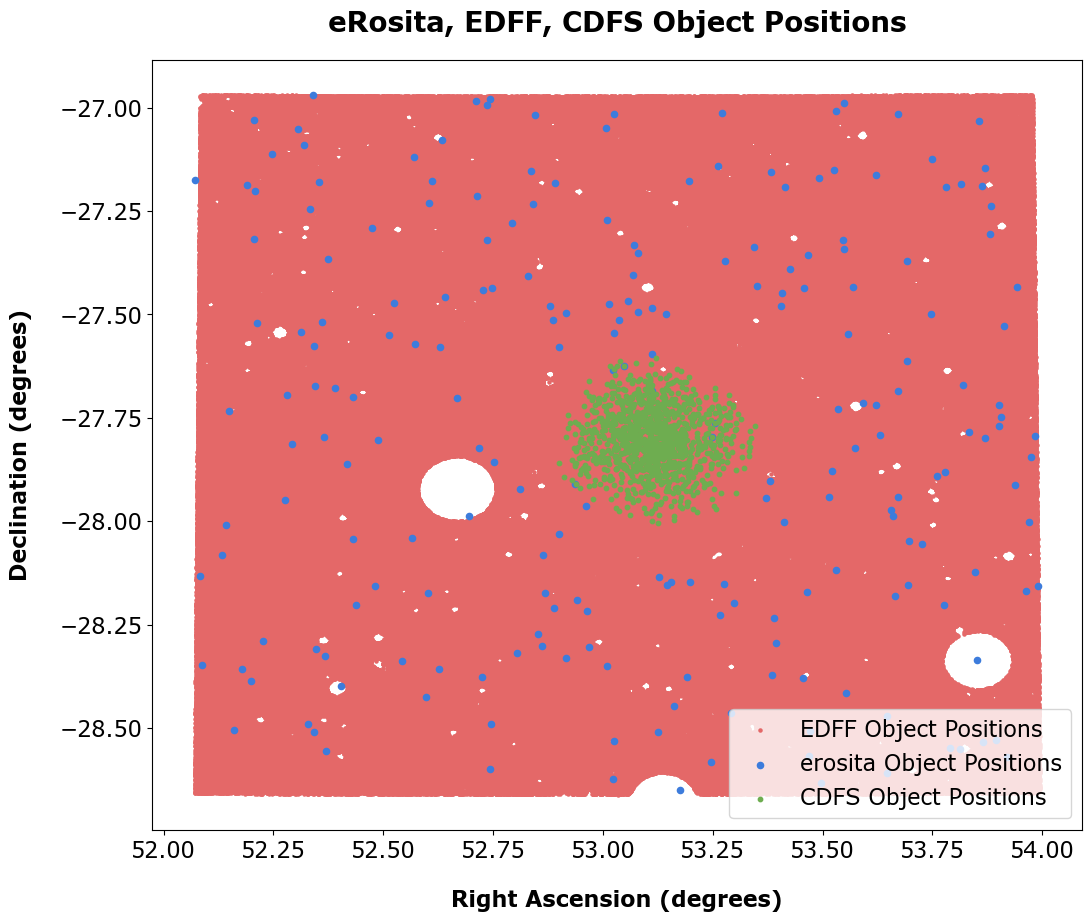

In [8]:
min_RA = max(df_erosita_RA.min(), df_edff_RA.min())
max_RA = min(df_erosita_RA.max(), df_edff_RA.max())
min_DEC = max(df_erosita_DEC.min(), df_edff_DEC.min())
max_DEC = min(df_erosita_DEC.max(), df_edff_DEC.max())


filtered_erosita = df_erosita[
    (df_erosita_RA >= min_RA) & (df_erosita_RA <= max_RA) &
    (df_erosita_DEC >= min_DEC) & (df_erosita_DEC <= max_DEC)
]

filtered_edff = df_edff[
    (df_edff_RA >= min_RA) & (df_edff_RA <= max_RA) &
    (df_edff_DEC >= min_DEC) & (df_edff_DEC <= max_DEC)
]

filtered_erosita_RA, filtered_erosita_DEC = filtered_erosita['RA_RAW'], filtered_erosita['DEC_RAW']
filtered_edff_RA, filtered_edff_DEC = filtered_edff['ALPHA_J2000'], filtered_edff['DELTA_J2000']

print(f"EDFF: {len(filtered_edff)} erosita: {len(filtered_erosita)} CDFS: {len(df_cdfs)}")

fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(filtered_edff_RA, filtered_edff_DEC, c=edff_color, s=5, label='EDFF Object Positions')
ax.scatter(filtered_erosita_RA, filtered_erosita_DEC, c=erosita_color, s=20, label='erosita Object Positions')
ax.scatter(df_cdfs_RA, df_cdfs_DEC, c=cdfs_color, s=10, label='CDFS Object Positions')

ax.set_title('eRosita, EDFF, CDFS Object Positions')
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.legend()
ax.grid(False)

plt.savefig('images/all_fields.png')
plt.show()

# Dataset Column Headers

In [13]:
max_len = max(len(df_edff.columns), len(df_erosita.columns), len(df_cdfs.columns))
columns_edff = list(df_edff.columns) + [''] * (max_len - len(df_edff.columns))
columns_erosita = list(df_erosita.columns) + [''] * (max_len - len(df_erosita.columns))
columns_cdfs = list(df_cdfs.columns) + [''] * (max_len - len(df_cdfs.columns))

table = [(i, columns_edff[i], columns_erosita[i], columns_cdfs[i]) for i in range(max_len)]

# Convert the table to a DataFrame
df_columns = pd.DataFrame(table, columns=['Index', 'EDFF_columns', 'eROSITA_columns', 'CDFS_columns'])

pd.set_option('display.max_rows', None)
df_columns.head(100000)



,Index,EDFF_columns,eROSITA_columns,CDFS_columns
0,0,ID,IAUNAME,RAJ2000
1,1,ALPHA_J2000,DETUID,DEJ2000
2,2,DELTA_J2000,SKYTILE,logPB
3,3,X_MODEL,ID_SRC,errPos
4,4,Y_MODEL,UID,FB
5,5,ERRX_MODEL,UID_Hard,e_FB
6,6,ERRY_MODEL,ID_CLUSTER,e_fb_lc
7,7,ALPHA_DETECTION,RA,SB
8,8,DELTA_DETECTION,DEC,e_SB
9,9,FARMER_ID,RA_RAW,e_sb_lc
